## TensorFlow+kerasでIris問題を解く

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report
from sklearn.metrics import confusion_matrix

### Iris問題を解いてみる
petal : 花弁  
sepal : がく片

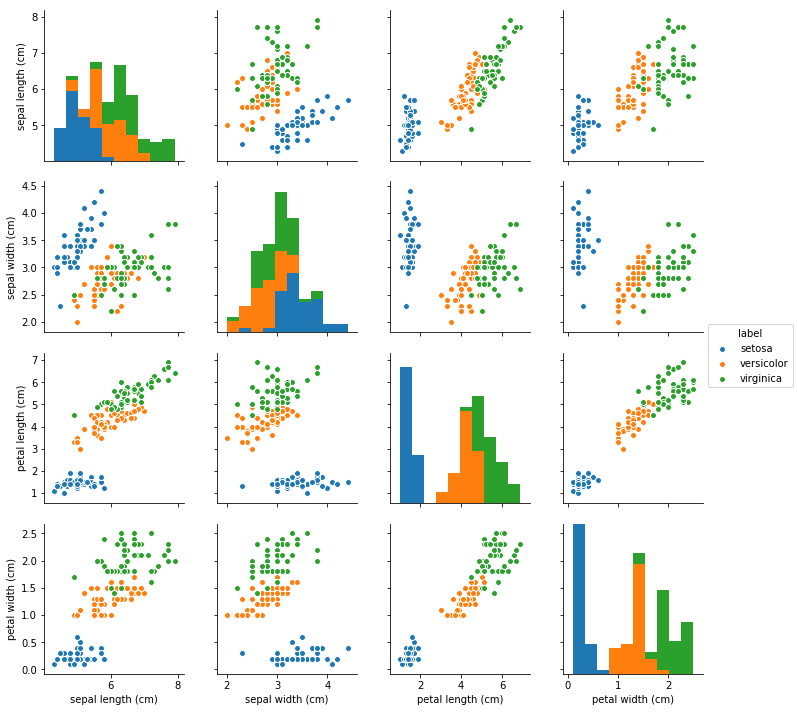

In [9]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris["label"] = iris.target
df_iris["label"] = df_iris["label"].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
sns.pairplot(df_iris, hue="label")

In [10]:
# データの準備
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# one-hotベクトルに変換
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("X_train=",X_train)
print()
print("X_test=",X_test)
print()
print("y_train=",y_train)
print()
print("y_test=",y_test)

X_train= [[4.9 3.1 1.5 0.1]
 [5.8 2.8 5.1 2.4]
 [6.7 3.  5.2 2.3]
 [7.7 3.  6.1 2.3]
 [6.7 3.1 5.6 2.4]
 [4.9 3.  1.4 0.2]
 [6.5 3.  5.2 2. ]
 [7.6 3.  6.6 2.1]
 [6.2 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.6 2.9 4.6 1.3]
 [5.1 3.5 1.4 0.3]
 [5.1 3.4 1.5 0.2]
 [7.4 2.8 6.1 1.9]
 [5.7 2.5 5.  2. ]
 [6.5 3.2 5.1 2. ]
 [5.1 3.7 1.5 0.4]
 [5.5 4.2 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [6.3 2.5 5.  1.9]
 [6.  2.2 4.  1. ]
 [6.1 2.6 5.6 1.4]
 [6.7 3.3 5.7 2.5]
 [5.7 2.8 4.5 1.3]
 [5.  3.6 1.4 0.2]
 [6.4 2.7 5.3 1.9]
 [5.4 3.7 1.5 0.2]
 [7.9 3.8 6.4 2. ]
 [5.7 4.4 1.5 0.4]
 [6.  2.9 4.5 1.5]
 [5.6 3.  4.1 1.3]
 [5.4 3.9 1.7 0.4]
 [5.8 2.7 4.1 1. ]
 [5.  3.4 1.5 0.2]
 [6.2 3.4 5.4 2.3]
 [6.4 2.8 5.6 2.2]
 [6.  3.  4.8 1.8]
 [6.  3.4 4.5 1.6]
 [5.7 3.8 1.7 0.3]
 [5.  3.3 1.4 0.2]
 [5.9 3.  5.1 1.8]
 [6.  2.7 5.1 1.6]
 [5.5 2.6 4.4 1.2]
 [5.1 3.8 1.9 0.4]
 [6.7 3.1 4.7 1.5]
 [6.5 3.  5.8 2.2]
 [5.9 3.2 4.8 1.8]
 [6.3 3.3 4.7 1.6]
 [6.3 2.5 4.9 1.5]
 [4

### kerasで解く

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

model = Sequential()
model.add(Dense(6, activation='relu', input_dim=4))
# model.add(Dense(5, activation='relu', input_dim=6))
model.add(Dense(3, activation='softmax'))#最終層のactivationは変更しないこと

# ------ 最適化手法 ------
sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
rms = RMSprop(lr=0.01)
adag = Adagrad(lr=0.01)
adad = Adadelta(lr=0.01)
adam = Adam(lr=0.01)
# -----------------------------

model.compile(loss='categorical_crossentropy',
              optimizer=adad,
              metrics=['accuracy'])

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 0s 4ms/step - loss: 1.5120 - acc: 0.3619 - val_loss: 1.6328 - val_acc: 0.2667
Epoch 2/50
105/105 [==============================] - 0s 168us/step - loss: 1.5116 - acc: 0.3619 - val_loss: 1.6324 - val_acc: 0.2667
Epoch 3/50
105/105 [==============================] - 0s 120us/step - loss: 1.5113 - acc: 0.3619 - val_loss: 1.6320 - val_acc: 0.2667
Epoch 4/50
105/105 [==============================] - 0s 103us/step - loss: 1.5109 - acc: 0.3619 - val_loss: 1.6315 - val_acc: 0.2667
Epoch 5/50
105/105 [==============================] - 0s 126us/step - loss: 1.5105 - acc: 0.3619 - val_loss: 1.6311 - val_acc: 0.2667
Epoch 6/50
105/105 [==============================] - 0s 141us/step - loss: 1.5102 - acc: 0.3619 - val_loss: 1.6307 - val_acc: 0.2667
Epoch 7/50
105/105 [==============================] - 0s 141us/step - loss: 1.5098 - acc: 0.3619 - val_loss: 1.6302 - val_acc: 0.2667
Epoch 8/50
105/105 

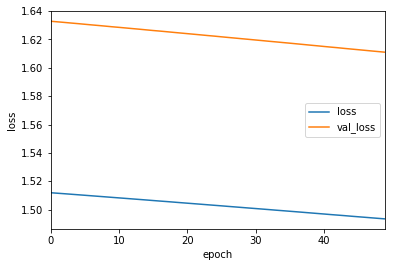

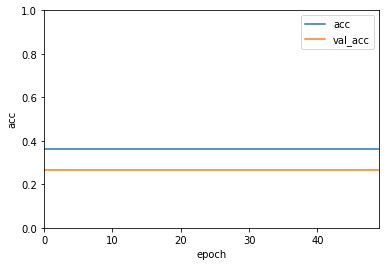

In [35]:
# 計算の実行
fit = model.fit(X_train, y_train,
          epochs=50,
          batch_size=40,validation_data=(X_test, y_test))

# 各epochにおける損失と精度をdfに入れる
df = pd.DataFrame(fit.history)

# グラフ化
df[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

df[["acc", "val_acc"]].plot()
plt.ylabel("acc")
plt.xlabel("epoch")
plt.ylim([0,1.0])
plt.show()

### [演習]
* epochを変更してみましょう
* batchサイズを変更してみましょう
* activationを変更してみましょう
* 層数を変更してみましょう
* 各層のノード数を変更してみましょう
* 学習率を変更してみましょう
* 学習率の最適化手法を変更してみましょう

### 計算結果の重みを表示する

In [36]:
weights = model.get_weights()
for i in range(len(weights)):
    print("weights[%s]="%i)
    print(weights[i])
    print("num:",weights[i].flatten().shape[0])
    print()

weights[0]=
[[-0.4891628  -0.3924602   0.280294    0.09876835 -0.5884637  -0.7709184 ]
 [-0.08239549  0.6789768   0.02435046 -0.4676066  -0.05925995 -0.66166985]
 [ 0.29584157  0.5347234  -0.00535526 -0.43066338 -0.08602738  0.09125429]
 [ 0.12189537 -0.16580765 -0.17098127  0.16250837  0.39818442  0.6268426 ]]
num: 24

weights[1]=
[ 0.         -0.00234274 -0.00230746  0.          0.          0.        ]
num: 6

weights[2]=
[[ 0.27249503  0.00229555 -0.52809274]
 [-0.12218314  0.2568584   0.4923836 ]
 [-0.52039224  0.5826161   0.7955047 ]
 [-0.4204353   0.6924728  -0.13510382]
 [ 0.00083494 -0.22688746 -0.33293906]
 [-0.12165815  0.6533736   0.45323884]]
num: 18

weights[3]=
[ 2.2735938e-03 -9.2655879e-05 -2.3764698e-03]
num: 3



In [40]:
weights

[array([[-0.4891628 , -0.3924602 ,  0.280294  ,  0.09876835, -0.5884637 ,
         -0.7709184 ],
        [-0.08239549,  0.6789768 ,  0.02435046, -0.4676066 , -0.05925995,
         -0.66166985],
        [ 0.29584157,  0.5347234 , -0.00535526, -0.43066338, -0.08602738,
          0.09125429],
        [ 0.12189537, -0.16580765, -0.17098127,  0.16250837,  0.39818442,
          0.6268426 ]], dtype=float32),
 array([ 0.        , -0.00234274, -0.00230746,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[ 0.27249503,  0.00229555, -0.52809274],
        [-0.12218314,  0.2568584 ,  0.4923836 ],
        [-0.52039224,  0.5826161 ,  0.7955047 ],
        [-0.4204353 ,  0.6924728 , -0.13510382],
        [ 0.00083494, -0.22688746, -0.33293906],
        [-0.12165815,  0.6533736 ,  0.45323884]], dtype=float32),
 array([ 2.2735938e-03, -9.2655879e-05, -2.3764698e-03], dtype=float32)]

### [問]
* 重みは全部でいくつありますか？

### kerasモデルの保存方法

In [7]:
from keras.models import load_model

# 保存
model.save('my_model.h5')
del model

# 読み込み
model = load_model('my_model.h5')

### 予測

In [41]:
y_pred = np.argmax(model.predict(X_test),axis=1)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [42]:
import pytorch

ModuleNotFoundError: No module named 'pytorch'